In [1]:
from utils.glove import GloVe
from utils.word_sample import WordSample
from utils import cosine_sim
import numpy as np

In [2]:
glove = GloVe("glove.6B.100d.txt")

Loaded the file: glove.6B.100d.txt
Number of words: 400000


In [3]:
words = WordSample("./words_alpha.txt", incl_words=glove.wordset, n_samples=10000).words


./words_alpha.txt has 370099 words.
# of words intersect with `incl_words`:  100776


In [4]:
emb_vecs = glove.get_emb_vecs_of(words)
# build the data-matrix with shape = (n_samples, emb_dims)
X = np.array([emb_vecs[w] for w in words])
# normalize it
length = np.sqrt((X**2).sum(axis=1))[:, None]
X = X / length


In [5]:
# select n_components
X.shape

(10000, 100)

In [36]:
from sklearn.cluster import KMeans
def get_kmean_model(n_clusters):
    ret = KMeans(init="k-means++", n_clusters=n_clusters, random_state=0, verbose=0)
    return ret

In [31]:
sse = dict()

In [32]:
import time

In [38]:
list_k = list(range(10, 200+1, 10))
for k in list_k:
    stime = time.time()
    km = get_kmean_model(k)
    km.fit(X)
    time_used = time.time() - stime
    print(
        f"n_clusters: {k}; inertia: {km.inertia_}; time_used: {time_used}")
    sse[k] = km.inertia_

n_clusters: 10; inertia: 8051.5947265625; time_used: 4.764432191848755
n_clusters: 20; inertia: 7744.64501953125; time_used: 5.547016620635986
n_clusters: 30; inertia: 7542.482421875; time_used: 6.692699193954468
n_clusters: 40; inertia: 7396.13818359375; time_used: 7.202378988265991
n_clusters: 50; inertia: 7274.2099609375; time_used: 8.25608515739441
n_clusters: 60; inertia: 7176.3583984375; time_used: 30.270332098007202
n_clusters: 70; inertia: 7100.4951171875; time_used: 34.26964998245239
n_clusters: 80; inertia: 7030.08251953125; time_used: 30.81054997444153
n_clusters: 90; inertia: 6967.79052734375; time_used: 33.900087118148804
n_clusters: 100; inertia: 6913.5068359375; time_used: 32.667887926101685
n_clusters: 110; inertia: 6863.11328125; time_used: 33.87163949012756
n_clusters: 120; inertia: 6817.33544921875; time_used: 35.989983320236206
n_clusters: 130; inertia: 6775.09619140625; time_used: 33.65114140510559
n_clusters: 140; inertia: 6731.20361328125; time_used: 33.450858592

In [39]:
from kneed import KneeLocator

In [43]:
x = list(range(10, 200+1, 10))
y = [sse[k] for k in x]


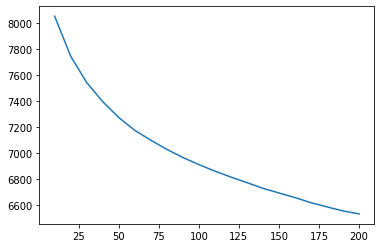

In [45]:
plt.plot(x, y)

In [46]:
kneedle = KneeLocator(x, y, S=1.0, curve='convex', direction='decreasing', online=True, interp_method="interp1d")

In [47]:
print(kneedle.knee)
print(kneedle.knee_y)

60
7176.3583984375


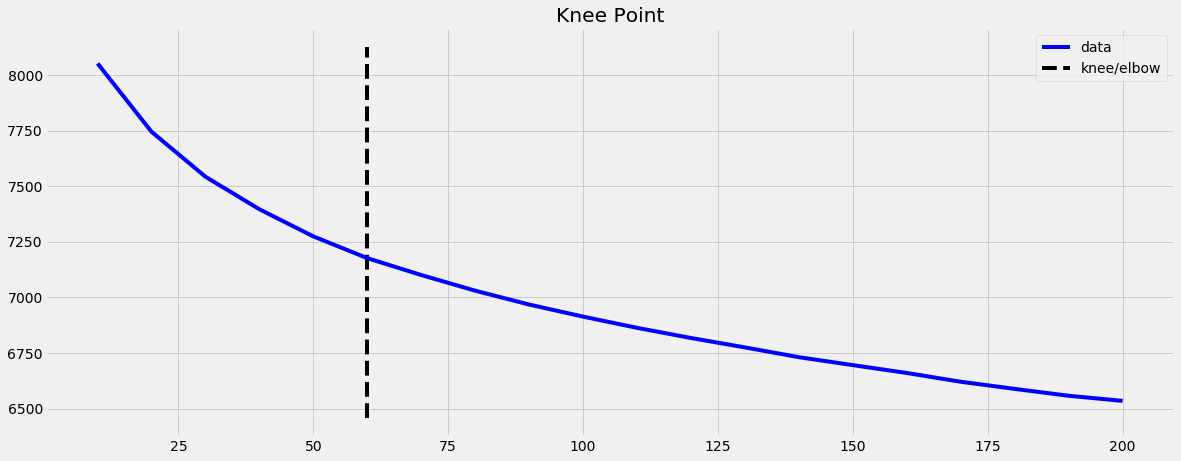

In [48]:
plt.style.use('fivethirtyeight')
kneedle.plot_knee(figsize=(18, 7))

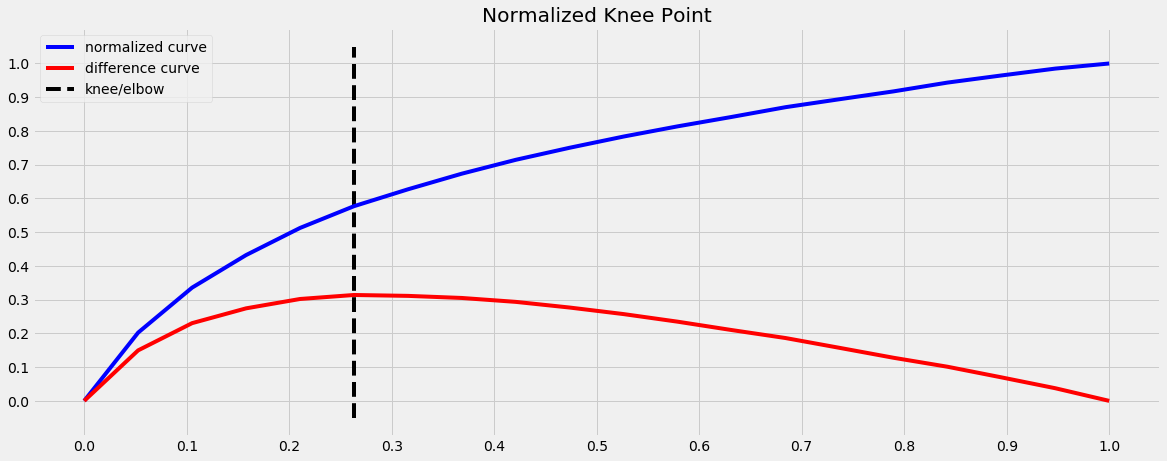

In [49]:
kneedle.plot_knee_normalized(figsize=(18, 7))